<a href="https://colab.research.google.com/github/filipe-rds/Projeto_Capacitacao_IA_Ciclo_1/blob/main/Projeto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📜 Projeto Final - Capacitação IA (Ciclo 1)
# 🎓 Aluno: Filipe da Silva Rodrigues

## 💻 Bibliotecas Necessárias

In [1]:
# Tratamento de Dataset e Gráficos
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Modelos de Treinamento

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# Multi-layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier, MLPRegressor
# Support Vector Machine
from sklearn.svm import SVC, SVR
# Random Forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# XGBoost
from xgboost import XGBClassifier, XGBRegressor
#!pip install xgboost


## 👾 Dataset de Classificação - Seaborn: Dots


---


Esse dataframe é um conjunto de dados que contém informações sobre um experimento acerca da percepção visual de pontos em movimento. As variáveis são:

- align: o alinhamento dos pontos com o alvo (dots ou sacc).
- choice: o alvo escolhido pelo participante (T1 ou T2).
- time: o tempo desde o início do julgamento (em milissegundos).
- coherence: a coerência do movimento dos pontos (em porcentagem).
- firing_rate: a taxa de disparo média de um neurônio hipotético sensível à escolha (em hertz).

✅ Objetivo: Prever qual alvo escolhido pelo participante de acordo com as características coletadas.

In [35]:
# url = "https://github.com/mwaskom/seaborn-data/blob/master/dots.csv"
dataset = sns.load_dataset("dots")
dataset = dataset.dropna()
print('\nDataset Original:\n')
display(dataset)

# Criando uma cópia do dataset para efetuar os devidos tratamentos
df = pd.DataFrame(dataset).copy()

# Convertendo labels (targets) para números

labels_columns = ['choice']
df[labels_columns] = df[labels_columns].astype('category')
df[labels_columns] = df[labels_columns].apply(lambda x: x.cat.codes)

# Normalizando os dados das features na escala (0..1)
columns_to_normalize = ['time', 'coherence', 'firing_rate']
df[columns_to_normalize] = MinMaxScaler().fit_transform(df[columns_to_normalize])

# Convertendo features categóricas para números com OneHotEncoder
categorical_columns = ['align']
column_transform = make_column_transformer((OneHotEncoder(drop='first'), categorical_columns), remainder='passthrough')
df = column_transform.fit_transform(df)
columns_names = column_transform.get_feature_names_out()

# Transformando o resultado em um DataFrame
df = pd.DataFrame(data=df, columns=columns_names)

# Renomenado as colunas para melhor entendimento
columns = df.columns

# Dicionário para mapear as colunas a serem renomeadas
rename_mapping = {}

for column in columns:
    if column.startswith('onehotencoder__'):
        new_column_name = column.replace('onehotencoder__', '')
        rename_mapping[column] = new_column_name
    if column.startswith('remainder__'):
        new_column_name = column.replace('remainder__', '')
        rename_mapping[column] = new_column_name

#print(rename_mapping)

# Renomeando as colunas
df.rename(columns=rename_mapping, inplace=True)

# Exibindo o DataFrame tratado com as colunas renomeadas
print('\nDataset Tratado para Treinamento:\n')
display(df)

# Separando os dados para treinamento e teste
y = df['choice'] # Coluna 'choice'
x = df.drop('choice',axis=1) # Todas as outras colunas


Dataset Original:



,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804



Dataset Tratado para Treinamento:



,align_sacc,choice,time,coherence,firing_rate
0,0.0,0.0,0.393939,0.0000,0.422031
1,0.0,0.0,0.393939,0.0625,0.398538
2,0.0,0.0,0.393939,0.1250,0.439121
3,0.0,0.0,0.393939,0.2500,0.413280
4,0.0,0.0,0.393939,0.5000,0.451362
...,...,...,...,...,...
843,1.0,1.0,0.681818,0.0625,0.423470
844,1.0,1.0,0.681818,0.1250,0.334126
845,1.0,1.0,0.681818,0.2500,0.348670
846,1.0,1.0,0.681818,0.5000,0.325122


🤖 Resultados

In [36]:
# Inicializando os modelos de treinamento

# DT - Decision Tree
model_dt1 = DecisionTreeClassifier(criterion='gini', max_depth=500)
model_dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=1000)

# KNN - K-Nearest Neighbors
model_knn1 = KNeighborsClassifier(n_neighbors=50, metric='euclidean')
model_knn2 = KNeighborsClassifier(n_neighbors=100, metric='manhattan')

# MLP - Multi-layer Perceptron
model_mlp1 = MLPClassifier(hidden_layer_sizes=(150, 100), max_iter=1000, activation='relu')
model_mlp2 = MLPClassifier(hidden_layer_sizes=(300, 200), max_iter=2000, activation='tanh')

# SVM - Support Vector Machine
model_svm1 = SVC(kernel='linear', C=1, gamma='scale')
model_svm2 = SVC(kernel='rbf', C=0.1, gamma='scale')

# RF - Random Forest
model_rf = RandomForestClassifier(n_estimators=100, max_depth=1000)

# XGB - XGBoost
model_xgb = XGBClassifier(objective='binary:logistic', max_depth=1000, learning_rate=0.3)



# Treinamento dos modelos e avaliação da acurácia

# Lista para armazenar os resultados
accuracies = []

# Número de repetições do treinamento
n = 10

for i in range(n):
    # Realizando o Train-Test-Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=np.random.randint(1000))

    # Treinamento dos modelos
    model_dt1.fit(x_train, y_train)
    model_dt2.fit(x_train, y_train)

    model_knn1.fit(x_train, y_train)
    model_knn2.fit(x_train, y_train)

    model_mlp1.fit(x_train, y_train)
    model_mlp2.fit(x_train, y_train)

    model_svm1.fit(x_train, y_train)
    model_svm2.fit(x_train, y_train)

    model_rf.fit(x_train, y_train)

    model_xgb.fit(x_train, y_train)

    # Previsões para cada modelo
    predictions_dt1 = model_dt1.predict(x_test)
    predictions_dt2 = model_dt2.predict(x_test)

    predictions_knn1 = model_knn1.predict(x_test)
    predictions_knn2 = model_knn2.predict(x_test)

    predictions_mlp1 = model_mlp1.predict(x_test)
    predictions_mlp2 = model_mlp2.predict(x_test)

    predictions_svm1 = model_svm1.predict(x_test)
    predictions_svm2 = model_svm2.predict(x_test)

    predictions_rf = model_rf.predict(x_test)

    predictions_xgb = model_xgb.predict(x_test)

    # Cálculo da acurácia para cada modelo
    acc_dt1 = accuracy_score(y_test, predictions_dt1)
    acc_dt2 = accuracy_score(y_test, predictions_dt2)

    acc_knn1 = accuracy_score(y_test, predictions_knn1)
    acc_knn2 = accuracy_score(y_test, predictions_knn2)

    acc_mlp1 = accuracy_score(y_test, predictions_mlp1)
    acc_mlp2 = accuracy_score(y_test, predictions_mlp2)

    acc_svm1 = accuracy_score(y_test, predictions_svm1)
    acc_svm2 = accuracy_score(y_test, predictions_svm2)

    acc_rf = accuracy_score(y_test, predictions_rf)

    acc_xgb = accuracy_score(y_test, predictions_xgb)

    # Armazamento das acurácias na lista
    accuracies.append([acc_dt1, acc_dt2, acc_knn1, acc_knn2, acc_mlp1, acc_mlp2, acc_svm1, acc_svm2, acc_rf, acc_xgb])


# Convertendo a lista para um array numpy para calcular a média
accuracies = np.array(accuracies)

# Calculando a média das acurácias para cada modelo
average_accuracies = np.mean(accuracies, axis=0)

# Rótulo com o nome dos modelos
model_names = ['DT1', 'DT2', 'KNN1', 'KNN2', 'MLP1', 'MLP2', 'SVM1', 'SVM2', 'RF', 'XGB']

# Apresentar a média das execuções dos resultados de acurácia de todos os modelos
for model, acc in zip(model_names, average_accuracies):
    print(f'{model}: {acc*100:.3f} %')

DT1: 81.706 %
DT2: 80.706 %
KNN1: 79.118 %
KNN2: 77.706 %
MLP1: 83.412 %
MLP2: 80.000 %
SVM1: 77.529 %
SVM2: 74.588 %
RF: 79.059 %
XGB: 80.588 %


📊 Gráficos



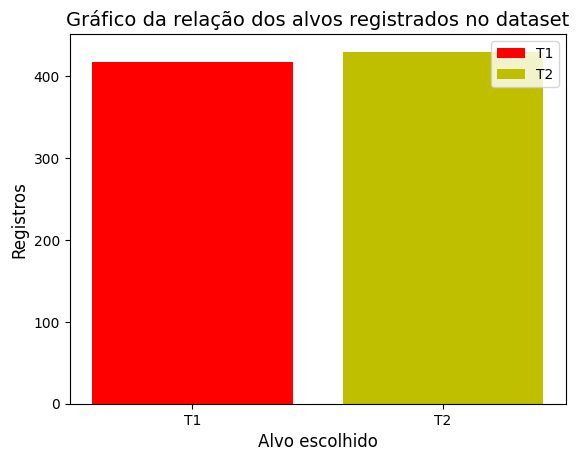

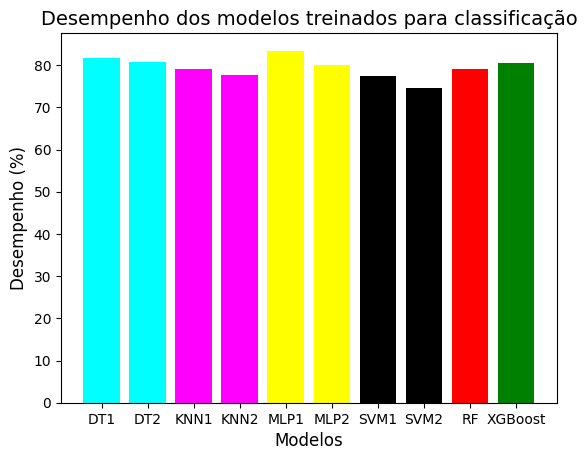

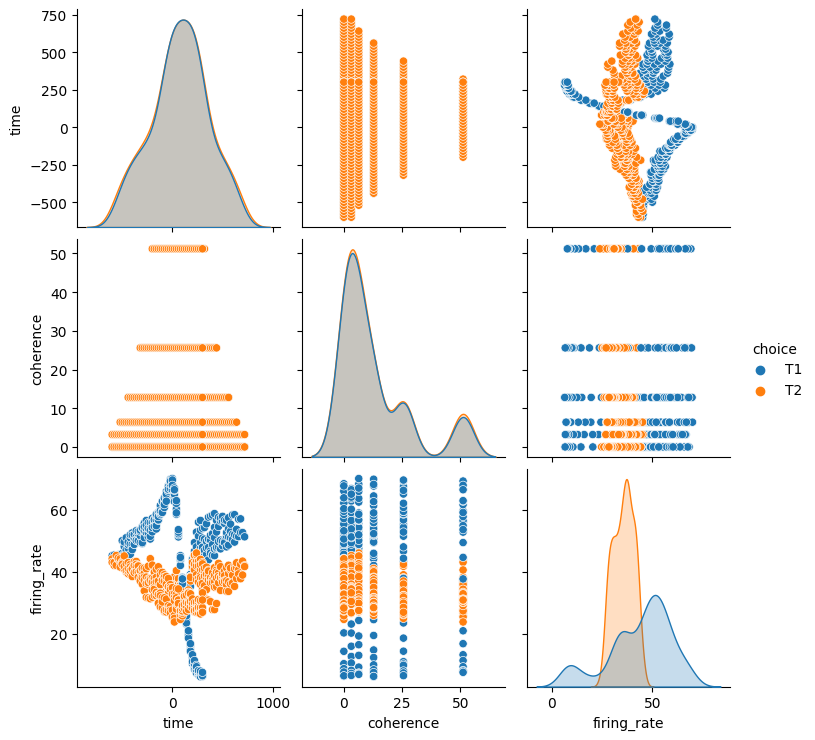

In [37]:
# Gráfico de Barras - Dados do Dataset (Classificação)
alvo = dataset['choice'].values
t1 = 0
t2 = 0

for i in alvo:
    if i == 'T1':
        t1 += 1
    elif i == 'T2':
        t2 += 1
plt.bar('T1', t1, label = 'T1', color = 'r')
plt.bar('T2', t2, label = 'T2', color = 'y')

plt.title('Gráfico da relação dos alvos registrados no dataset', fontsize=14)
plt.xlabel('Alvo escolhido', fontsize=12)
plt.ylabel('Registros', fontsize=12)
plt.legend()
plt.show()



# Gráfico de Barras - Desempenho dos modelos

plt.bar('DT1',    (average_accuracies[0]*100), color = 'cyan')
plt.bar('DT2',    (average_accuracies[1]*100), color = 'cyan')
plt.bar('KNN1',   (average_accuracies[2]*100), color = 'magenta')
plt.bar('KNN2',   (average_accuracies[3]*100), color = 'magenta')
plt.bar('MLP1',   (average_accuracies[4]*100), color = 'yellow')
plt.bar('MLP2',   (average_accuracies[5]*100), color = 'yellow')
plt.bar('SVM1',   (average_accuracies[6]*100), color = 'black')
plt.bar('SVM2',   (average_accuracies[7]*100), color = 'black')
plt.bar('RF',      (average_accuracies[8]*100), color = 'red')
plt.bar('XGBoost', (average_accuracies[9]*100), color = 'green')

plt.title('Desempenho dos modelos treinados para classificação', fontsize=14)
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('Desempenho (%)', fontsize=12)
plt.show()



# Gráfico Pair Plot
sns.pairplot(data=dataset, hue='choice')




## 👾 Dataset de Regressão - Seaborn: Tips


---


Esse dataframe é um conjunto de dados que contém informações sobre as gorjetas dadas por clientes em um restaurante. Ele tem as seguintes colunas:

- total_bill: o valor total da conta em dólares.
- tip: o valor da gorjeta em dólares.
- sex: o sexo do cliente que pagou a conta (Male ou Female).
- smoker: se o cliente era fumante ou não (Yes ou No).
- day: o dia da semana em que a conta foi paga (Thur, Fri, Sat ou Sun).
- time: o horário do dia em que a conta foi paga (Lunch ou Dinner).
- size: o número de pessoas na mesa.

✅ Objetivo: Prever o valor da gorjeta de acordo com as características observadas no restaurante.

In [29]:
# url = "https://github.com/mwaskom/seaborn-data/blob/master/tips.csv"
dataset = sns.load_dataset("tips")
dataset = dataset.dropna()
print('\nDataset Original:\n')
display(dataset)

# Criando uma cópia do dataset para efetuar os devidos tratamentos
df = pd.DataFrame(dataset).copy()

# Normalizando os dados das features na escala (0..1)

columns_to_normalize = ['total_bill', 'size']
df[columns_to_normalize] = MinMaxScaler().fit_transform(df[columns_to_normalize])

# Convertendo features categóricas para números com OneHotEncoder
categorical_columns = ['sex', 'smoker', 'day', 'time']
column_transform = make_column_transformer((OneHotEncoder(drop='first'), categorical_columns), remainder='passthrough')
df = column_transform.fit_transform(df)
columns_names = column_transform.get_feature_names_out()

# Transformando o resultado em um DataFrame
df = pd.DataFrame(data=df, columns=columns_names)

# Renomenado as colunas para melhor entendimento
columns = df.columns

# Dicionário para mapear as colunas a serem renomeadas
rename_mapping = {}

for column in columns:
    if column.startswith('onehotencoder__'):
        new_column_name = column.replace('onehotencoder__', '')
        rename_mapping[column] = new_column_name
    if column.startswith('remainder__'):
        new_column_name = column.replace('remainder__', '')
        rename_mapping[column] = new_column_name

#print(rename_mapping)

# Renomeando as colunas
df.rename(columns=rename_mapping, inplace=True)

# Exibindo o DataFrame tratado com as colunas renomeadas
print('\nDataset Tratado para Treinamento:\n')
display(df)

# Separando os dados para treinamento e teste
y = df['tip']  # Coluna 'tip'
x = df.drop('tip',axis=1)  # Todas as outras colunas



Dataset Original:



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2



Dataset Tratado para Treinamento:



,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,total_bill,tip,size
0,0.0,0.0,0.0,1.0,0.0,0.0,0.291579,1.01,0.2
1,1.0,0.0,0.0,1.0,0.0,0.0,0.152283,1.66,0.4
2,1.0,0.0,0.0,1.0,0.0,0.0,0.375786,3.50,0.4
3,1.0,0.0,0.0,1.0,0.0,0.0,0.431713,3.31,0.2
4,0.0,0.0,0.0,1.0,0.0,0.0,0.450775,3.61,0.6
...,...,...,...,...,...,...,...,...,...
239,1.0,0.0,1.0,0.0,0.0,0.0,0.543779,5.92,0.4
240,0.0,1.0,1.0,0.0,0.0,0.0,0.505027,2.00,0.2
241,1.0,1.0,1.0,0.0,0.0,0.0,0.410557,2.00,0.2
242,1.0,0.0,1.0,0.0,0.0,0.0,0.308965,1.75,0.2


🤖 Resultados

In [30]:
# Inicializando os modelos de treinamento

# DT - Decision Tree
model_dt1 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=500)
model_dt2 = DecisionTreeRegressor(criterion='squared_error', max_depth=1000)

# KNN - K-Nearest Neighbors
model_knn1 = KNeighborsRegressor(n_neighbors=50, metric='euclidean')
model_knn2 = KNeighborsRegressor(n_neighbors=100, metric='manhattan')

# MLP - Multi-layer Perceptron
model_mlp1 = MLPRegressor(hidden_layer_sizes=(150, 100), max_iter=2000, activation='relu')
model_mlp2 = MLPRegressor(hidden_layer_sizes=(300, 200), max_iter=3000, activation='tanh')

# SVR - Support Vector Regressor
model_svr1 = SVR(kernel='linear', C=1, gamma='scale')
model_svr2 = SVR(kernel='rbf', C=0.1, gamma='scale')

# RF - Random Forest
model_rf = RandomForestRegressor(n_estimators=100, max_depth=1000)

# XGB - XGBoost
model_xgb = XGBRegressor(objective='reg:squarederror', max_depth=1000, learning_rate=0.1)


# Treinamento dos modelos e avaliação dos resultados

# Listas para armazenar os resultados
mse_scores = []
rmse_scores = []
mae_scores = []

# Número de repetições do treinamento
n = 10

for i in range(n):
    # Realizando o Train-Test-Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=np.random.randint(1000))

    # Treinamento dos modelos
    model_dt1.fit(x_train, y_train)
    model_dt2.fit(x_train, y_train)

    model_knn1.fit(x_train, y_train)
    model_knn2.fit(x_train, y_train)

    model_mlp1.fit(x_train, y_train)
    model_mlp2.fit(x_train, y_train)

    model_svr1.fit(x_train, y_train)
    model_svr2.fit(x_train, y_train)

    model_rf.fit(x_train, y_train)

    model_xgb.fit(x_train, y_train)

    # Previsões para cada modelo
    predictions_dt1 = model_dt1.predict(x_test)
    predictions_dt2 = model_dt2.predict(x_test)

    predictions_knn1 = model_knn1.predict(x_test)
    predictions_knn2 = model_knn2.predict(x_test)

    predictions_mlp1 = model_mlp1.predict(x_test)
    predictions_mlp2 = model_mlp2.predict(x_test)

    predictions_svr1 = model_svr1.predict(x_test)
    predictions_svr2 = model_svr2.predict(x_test)

    predictions_rf = model_rf.predict(x_test)

    predictions_xgb = model_xgb.predict(x_test)

    # Cálculo das métricas para cada modelo

    # MSE
    mse_dt1 = mean_squared_error(y_test, predictions_dt1)
    mse_dt2 = mean_squared_error(y_test, predictions_dt2)

    mse_knn1 = mean_squared_error(y_test, predictions_knn1)
    mse_knn2 = mean_squared_error(y_test, predictions_knn2)

    mse_mlp1 = mean_squared_error(y_test, predictions_mlp1)
    mse_mlp2 = mean_squared_error(y_test, predictions_mlp2)

    mse_svr1 = mean_squared_error(y_test, predictions_svr1)
    mse_svr2 = mean_squared_error(y_test, predictions_svr2)

    mse_rf = mean_squared_error(y_test, predictions_rf)

    mse_xgb = mean_squared_error(y_test, predictions_xgb)

    # RMSE
    rmse_dt1 = np.sqrt(mse_dt1)
    rmse_dt2 = np.sqrt(mse_dt2)

    rmse_knn1 = np.sqrt(mse_knn1)
    rmse_knn2 = np.sqrt(mse_knn2)

    rmse_mlp1 = np.sqrt(mse_mlp1)
    rmse_mlp2 = np.sqrt(mse_mlp2)

    rmse_svr1 = np.sqrt(mse_svr1)
    rmse_svr2 = np.sqrt(mse_svr2)

    rmse_rf = np.sqrt(mse_rf)

    rmse_xgb = np.sqrt(mse_xgb)

    # MAE
    mae_dt1 = mean_absolute_error(y_test, predictions_dt1)
    mae_dt2 = mean_absolute_error(y_test, predictions_dt2)

    mae_knn1 = mean_absolute_error(y_test, predictions_knn1)
    mae_knn2 = mean_absolute_error(y_test, predictions_knn2)

    mae_mlp1 = mean_absolute_error(y_test, predictions_mlp1)
    mae_mlp2 = mean_absolute_error(y_test, predictions_mlp2)

    mae_svr1 = mean_absolute_error(y_test, predictions_svr1)
    mae_svr2 = mean_absolute_error(y_test, predictions_svr2)

    mae_rf = mean_absolute_error(y_test, predictions_rf)

    mae_xgb = mean_absolute_error(y_test, predictions_xgb)

    # Armazenar os resultados nas listas
    mse_scores.append([mse_dt1, mse_dt2, mse_knn1, mse_knn2, mse_mlp1, mse_mlp2, mse_svr1, mse_svr2, mse_rf, mse_xgb])
    rmse_scores.append([rmse_dt1, rmse_dt2, rmse_knn1, rmse_knn2, rmse_mlp1, rmse_mlp2, rmse_svr1, rmse_svr2, rmse_rf, rmse_xgb])
    mae_scores.append([mae_dt1, mae_dt2, mae_knn1, mae_knn2, mae_mlp1, mae_mlp2, mae_svr1, mae_svr2, mae_rf, mae_xgb])

# Converter as listas para arrays numpy para calcular as médias
mse_scores = np.array(mse_scores)
rmse_scores = np.array(rmse_scores)
mae_scores = np.array(mae_scores)

# Apresentar a média das execuções dos resultados de MSE, RMSE e MAE para cada modelo
average_mse_scores = np.mean(mse_scores, axis=0)
average_rmse_scores = np.mean(rmse_scores, axis=0)
average_mae_scores = np.mean(mae_scores, axis=0)

# Rótulo com o nome dos modelos
model_names = ['DT1', 'DT2', 'KNN1', 'KNN2', 'MLP1', 'MLP2', 'SVR1', 'SVR2', 'RF', 'XGB']

# Apresentar os resultados
for model, mse, rmse, mae in zip(model_names, average_mse_scores, average_rmse_scores, average_mae_scores):
    print(f'{model}: MSE={mse:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}')

DT1: MSE=1.668, RMSE=1.275, MAE=0.928
DT2: MSE=1.696, RMSE=1.285, MAE=0.941
KNN1: MSE=1.920, RMSE=1.375, MAE=1.038
KNN2: MSE=1.881, RMSE=1.361, MAE=1.026
MLP1: MSE=1.980, RMSE=1.401, MAE=1.098
MLP2: MSE=1.239, RMSE=1.097, MAE=0.814
SVR1: MSE=1.267, RMSE=1.115, MAE=0.819
SVR2: MSE=1.885, RMSE=1.363, MAE=1.015
RF: MSE=1.196, RMSE=1.086, MAE=0.785
XGB: MSE=1.398, RMSE=1.177, MAE=0.841


📊 Gráficos

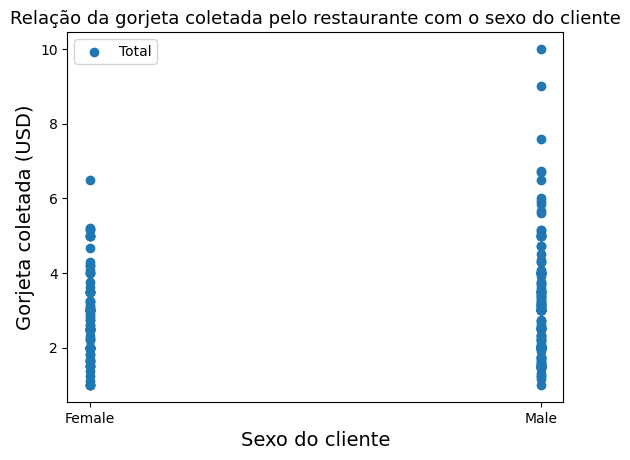

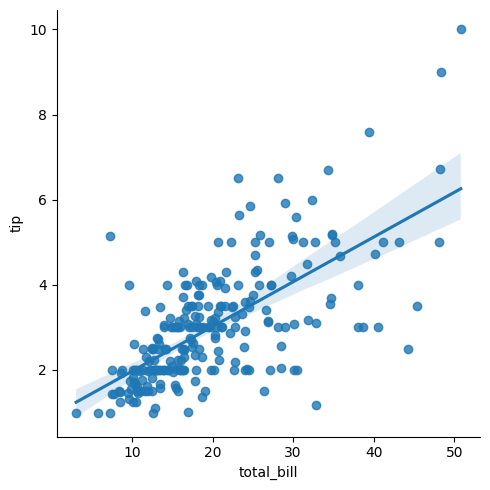

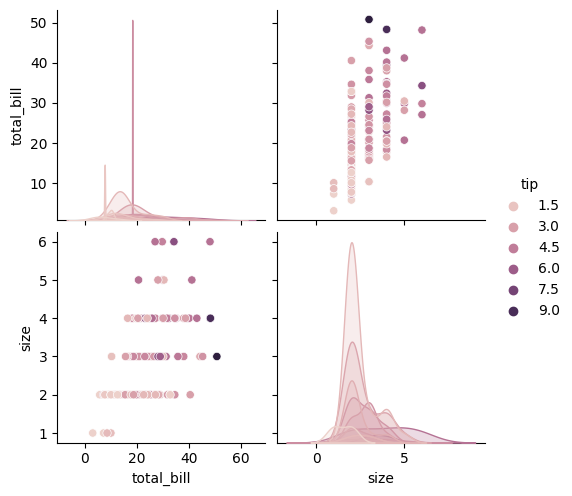

In [31]:
# Gráfico Scatter Plot

target = dataset['tip'].values
feature = dataset['sex'].values

plt.scatter(feature, target, label='Total')
plt.title('Relação da gorjeta coletada pelo restaurante com o sexo do cliente', fontsize=13)
plt.xlabel('Sexo do cliente', fontsize=14)
plt.ylabel('Gorjeta coletada (USD)', fontsize=14)
plt.legend()
plt.show()


# Gráfico de Dispersão - Dados do Dataset (Regressão)
sns.lmplot(data=dataset,
           x="total_bill",
           y="tip")



# Gráfico Pair Plot
sns.pairplot(data=dataset, hue='tip')


